# 13gini

In [3]:
import math

## 지니지수
* CART 알고리즘 지표로 사용
* 지니계수가 0이라는 의미는 불순도가 낮다는 뜻으로
  동일한 특성의 데이터들로 잘 분류되어 설명력이 높다는 의미임. 엔트로피에 비해서 계산식이 단순하다는 특징이 있다.
* ### $ G = 1 -\sum p_k^2 $

In [5]:
# 데이터 상황별 불순도 확인 (빨간공, 파랑공 갯수)

data1 = [0,10]
data2 = [3, 7]
data3 = [5, 5]

1 - (0/10)**2 - (10/10)**2    # 곱하기(제곱)이니까 기본 폼은 이렇게 된다. 전자는 빨간공, 후자는 파랑공 갯수)

0.0

## 답으로 0이 나오는데 잘 분류되었기 때문에 0이 나온것.

In [6]:
1 - (3/10)**2 - (7/10)**2    # 0.42

0.4200000000000001

In [7]:
1 - (5/10)**2 - (5/10)**2    # 0.5.

0.5

### 엔트로피에 비해서 계산식이 매우 간단함.

In [ ]:
# big   follow   walking      class

# yes     yes    yes          dog

# yes     yes    no           cat

# no      yes    yes          dog

# yes     yes    yes          dog

# no      no     yes          cat

# yes     no     yes          dog

# yes     no     yes          cat

# no      no     no           cat

# yes     yes    yes          dog

# no      yes    no           dog

In [9]:
# 1) target 지니계수 계산
# 10마리 중 개는 6마리, 고양이는 4마리
# 개로 분류될 확률: 6/10 = 0.6
# 고양이로 분류될 확률 : 4/10 = 0.4
# 자, 이제 식은 이렇게 작성한다.

1 - (6/10)**2 - (4/10)**2 

0.48

### 답은 0.48이 나온다. 그 다음에 덩치로 분류 시 지니계수 얼마 나오는지 확인해보자.

In [10]:
#2) 덩치big으로 분류했을때 지니계수 계산 

1 - (4/6)**2 - (2/6) **2
# 0.44

0.4444444444444445

In [11]:
#3) 덩치가 작은것으로 분류했을때 지니계수 계산 
# 덩치가 작은것으로 분류 = 개:고양이 => 2:2
# 덩치가 작을때 개로 분류될 확률 : 2/4
# 덩치가 작을때 고양이로 분류될 확률 : 2/4
1 - (2/4)**2 - (2/4)**2
#0.5

0.5

In [12]:
# 덩치로 분류했을때의 분류 획득량 지니계수
# 개로 분류될 확률 x 덩치로 분류했을때 불순도와
# 고양이로 분류될 확률 x 덩치로 분류했을때 불순도를 더한 결과값
6/10 * 0.44 + 4/10 * 0.5
#0.464

0.464

## 명확하게 분류되려면 0.4는 되야되는데 좀 애매하다는 확률. 0.4란 값은 6대4니까.

In [14]:
#3) 따름 fellow로 분류했을때 지니계수 계산
# 잘 따름으로 분류 = 개:고양이 => 5:1
# 잘 따를때 개로 분류될 확률 : 5/6
# 잘 따를 떄 고양이로 분류될 확률 : 1/6

1 - (5/6)**2 - (1/6)**2
# 0.268

0.2777777777777777

In [16]:
# 잘 안따름으로 분류 = 개:고양이 => 1:3
# 잘 안따를떄 개로 분류될 확률 : 1/4
# 잘 안따를때 고양이로 분류될 확률 : 3/4

1 - (1/4)**2 - (3/4) **2
1 - (1/4)**2 - (3/4) **2

# 0.375


0.375

In [17]:
#4) 산책으로 분류했을 때 지니계수 계산
# 산책한다로 분류 = 개:고양이 => 5:2
# 산책하는데 개로 분류될 확률 : 5/7
# 산책하는데 고양이로 분류될 확률 : 2/7
1 - (5/7)**2 - (2/7)**2
# 0.408

0.40816326530612246

In [18]:
# 산책안한다로 분류 = 개:고양이 => 5:2
# 산책안하는데 개로 분류될 확률 1/3
# 산책안하는데 고양이로 분류될 확률 : 2/3

1 - (1/3)**2 - (2/3)**2
# 0.444


0.4444444444444444

In [19]:
# 산책으로 분류했을때의 정보획득량

6/10 * 0.408 + 4/10 * 0.444
# 0.422

0.4224

# 따라서, 덩치,산책,따름 여부에 따라 정보의 불순도 비교

덩치 : 0.971 -> 0.464
산책 : 0.971 -> 0.422
따름 : 0.971 -> 0.317 

In [23]:
# 또 다른 풀이법
# 덩치가 큰 것으로 분류 = 개 : 고양이 => 4:2
G1 = (4/6) * (2/6)

# 덩치가 작은 것으로 분류 = 개: 고양이 => 2:2

G2 = (2/4) * (2/4)

In [26]:
#정보이득 
G = 2 * ((6/10) * G1 + (4/10) * G2)

In [28]:
G1,G2,G

(0.2222222222222222, 0.25, 0.4666666666666667)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pydotplus
from sklearn import tree
import matplotlib.image as pltimg


In [31]:
# 데이터 읽어오기
catdog = pd.read_csv('catdog.csv')
catdog.head()

,big,follow,walking,class
0,yes,yes,yes,dog
1,yes,yes,no,cat
2,no,yes,yes,dog
3,yes,yes,yes,dog
4,no,no,yes,cat


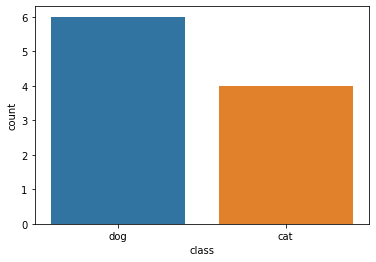

In [37]:
# 종속변수 빈도 확인
catdog['class'].value_counts()

sns.countplot(x='class', data=catdog)

# 전처리 - 레이블인코딩
cols = ['big','follow','walking','class']
for c in cols:
    catdog[c] = pd.Categorical(catdog[c])
    catdog[c] = catdog[c].cat.codes

In [38]:
# 데이터 분리 및 분석
data   = catdog.iloc[:, :3]
target = catdog['class']
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(data, target)
dtc.score(data, target)

0.9

In [39]:
# 분석결과 시각화
dot_data = tree.export_graphviz(dtc, out_file=None,feature_names=cols[:3],class_names=['cat', 'dog'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('catdog.png')


True

(-0.5, 694.5, 580.5, -0.5)

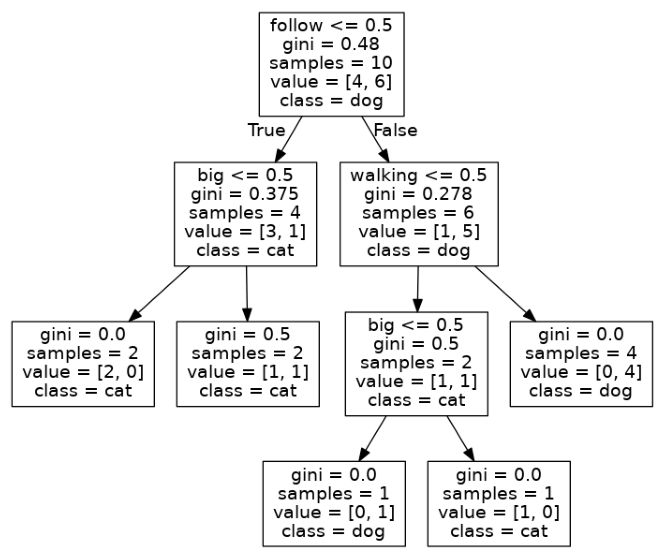

In [40]:
img = plt.imread('catdog.png')

plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')